# Predicting Boston Housing Price


In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print("Libraries imported")

Libraries imported


## Introduction

**Goal:** Build a regression model that outputs a single price value. 

The [dataset](https://storage.googleapis.com/tensorflow/tf-keras-datasets/boston_housing.npz) has 13 features and the our model takes those as input and outputs a single value prediction. The loss function to be used is the mean squared error (MSE).

In [2]:
#loading dataset
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data();

First, lets normalize the data calculating the mean and standard deviation from the training set.

In [3]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std


### Build Model

In [4]:
#building network - 20 neurons in 1 hidden layer and "mse" as loss function
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.optimizers.Adam(), loss='mse',metrics=['mae', 'mse'])
    return model

print("Model built")

Model built


### Training Model

In [5]:
model = build_model()

history = model.fit(train_features, train_labels, 
                    epochs=1000, verbose=0, validation_split = 0.1)

#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch

print("Training completed")

Training completed


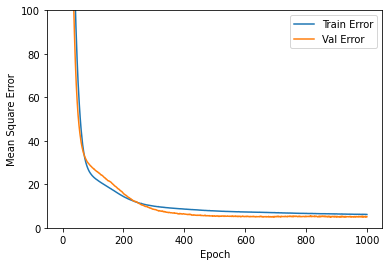

In [6]:
#plotting loss funciton dynamics - mse vs epoch 
plt.plot(history.history['mse'], label='Train Error')
plt.plot(history.history['val_mse'], label = 'Val Error')
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.legend()
plt.ylim([0,100])
plt.show()


In [7]:
#comparing model performance on test dataset
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test dataset: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 0s/step - loss: 17.3641 - mae: 2.6809 - mse: 17.3641
Root Mean Square Error on test dataset: 4.167


## Conclusion

When implementing the model on the test dataset, the model's score is RMSE = 3.848. 

This result corresponds to a 19th position on the [Kaggle leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard).